In [1]:
%cd ..

/home1/giorgian/projects/trigger-detection-pipeline/sPHENIX/tracking-GNN


/home1/giorgian/anaconda3/envs/jupyter/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from datasets.hit_graph_trigger_pileup import multi_load_graph, load_graph
import matplotlib.pyplot as plt
import os
import numpy as np

In [60]:
def mlg(intt_filename, mvtx_filenames, noise_filenames):
    return multi_load_graph(intt_filename, 
                            mvtx_filenames, 
                            noise_filenames, 
                            np.array([1, 1, 1]), 
                                     0.013, 
                            14.3, 
                            use_intt=True, 
                            construct_edges=True, 
                            drop_l1=False, 
                            drop_l2=False, 
                            drop_l3=False, 
                            intt_filter=False, 
                            add_global_node=False)

def lg(filename):
    return load_graph(filename, 
                            np.array([1, 1, 1]), 
                                     0.013, 
                            14.3, 
                            use_intt=True, 
                            construct_edges=True, 
                            drop_l1=False, 
                            drop_l2=False, 
                            drop_l3=False, 
                            add_global_node=False)


def cart(cyl):
    r = cyl[:, 0]
    phi = cyl[:, 1]
    x = r*np.cos(phi)
    y = r*np.sin(phi)
    x_cart = np.array(cyl)
    x_cart[:, 0] = x
    x_cart[:, 1] = y
    return x_cart
    

In [81]:
files_t = !ls -U /ssd3/giorgian/hits-data-january-2024-yasser/trigger/events
files_t = [os.path.join('/ssd3/giorgian/hits-data-january-2024-yasser/trigger/events', f) for f in files_t]

files_nt = !ls -U /ssd3/giorgian/hits-data-january-2024-yasser/nontrigger/events
files_nt = [os.path.join('/ssd3/giorgian/hits-data-january-2024-yasser/nontrigger/events', f) for f in files_nt]

files = files_t + files_nt



(-15.0, 15.0)

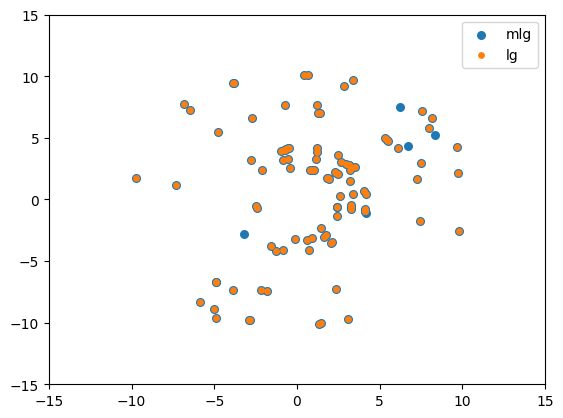

In [86]:
 x, edge_index, y, event_info = mlg(files_t[2], [], [files_nt[0]])
xc = cart(x)
plt.scatter(xc[:, 0], xc[:, 1], s=30, label='mlg')

x, edge_index, y, event_info = lg(files_t[2])
xc = cart(x)
plt.scatter(xc[:, 0], xc[:, 1], s=15, label='lg')
plt.legend()
plt.xlim(-15, 15)
plt.ylim(-15, 15)

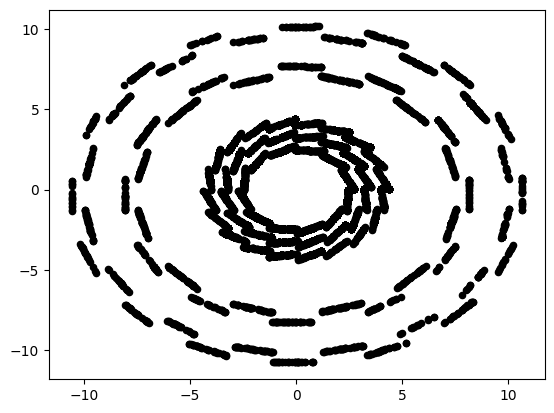

In [83]:
for file in files_t[:50]:
    x, edge_index, y, event_info =  mlg(file, files_nt[:10], [files_nt[0]])
    xc = cart(x)

    plt.scatter(xc[:, 0], xc[:, 1], s=20,  color='black')


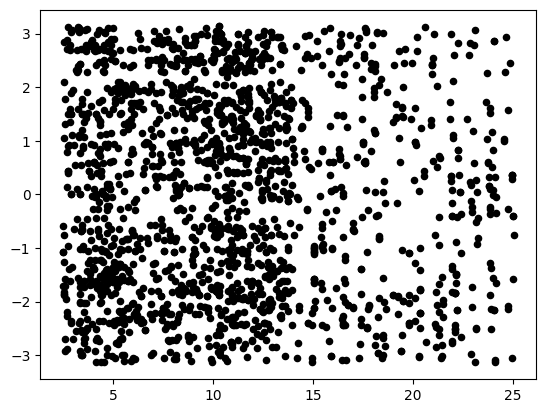

In [58]:
for file in files_nt[:50]:
    x, edge_index, y, event_info = lg(file)
    xc = cart(event_info.hit_cylindrical)
    xc = event_info.hit_cylindrical

    plt.scatter(xc[:, 0], xc[:, 1], s=20,  color='black')


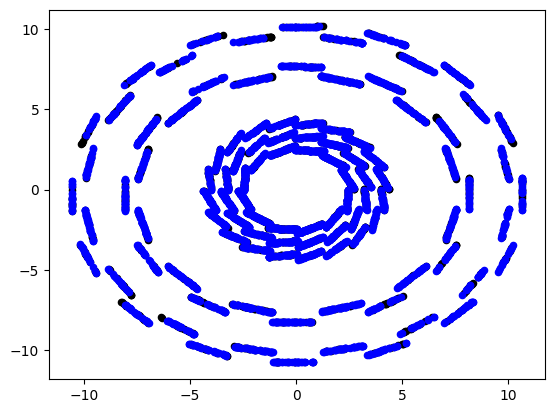

In [56]:
for file in files_nt[:50]:
    x, edge_index, y, event_info = lg(file)
    xc = event_info.hit_cartesian

    plt.scatter(xc[:, 0], xc[:, 1], s=20,  color='black')

for file in files_t[:50]:
    x, edge_index, y, event_info = lg(file)
    xc = event_info.hit_cartesian

    plt.scatter(xc[:, 0], xc[:, 1], s=20,  color='blue')


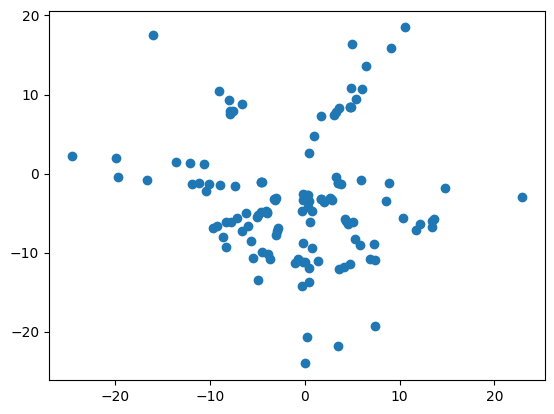

In [29]:
for file in files_t[:50]:
    x, edge_index, y, event_info = mlg(files_t[0], files_nt[:50], [files_nt[0]])
    xc = cart(x)

    plt.scatter(xc[:, 0], xc[:, 1], s=20, label='lg', color='black')
    plt.legend()